In [1]:
# my_notebook.ipynb

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:


# Load the saved CSV file into a new DataFrame
new_df = pd.read_csv('C:\\Users\\Nole\\Desktop\\Teleco\\Notebook\\Cleaned_data_csv\\cleaned_data.csv')

# Now you can use the new_df DataFrame for further analysis in pandas


## Task 4 - expiernece analysis

In [5]:
# Average TCP retransmission

In [4]:
new_df['Average TCP retransmission'] = new_df[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean(axis=1)
new_df['Average TCP retransmission']

0           13375.0
1           13375.0
2           13375.0
3           13375.0
4           13375.0
            ...    
146886    8357731.0
146887    8357731.0
146888    8357731.0
146889    8357731.0
146890    8357731.0
Name: Average TCP retransmission, Length: 146891, dtype: float64

<Axes: xlabel='None', ylabel='Average TCP retransmission'>

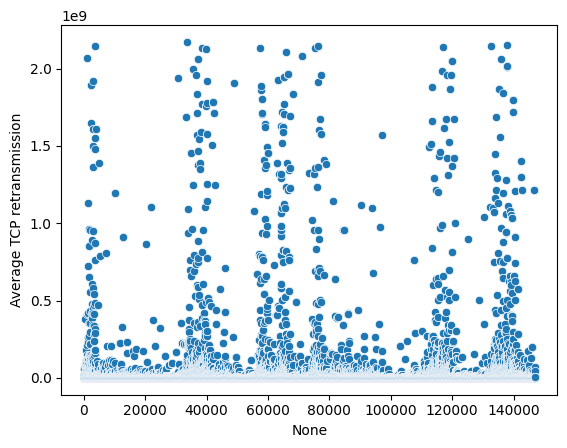

In [47]:
sns.scatterplot(x= new_df.index, y = new_df['Average TCP retransmission'])

# Average RTT

In [5]:
new_df['Average RTT'] = new_df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean(axis=1)
new_df['Average RTT']  


0          23.5
1          35.0
2          35.0
3          35.0
4          35.0
          ...  
146886    161.0
146887     16.0
146888     14.5
146889     24.5
146890     21.0
Name: Average RTT, Length: 146891, dtype: float64

<Axes: xlabel='None', ylabel='Avg RTT DL (ms)'>

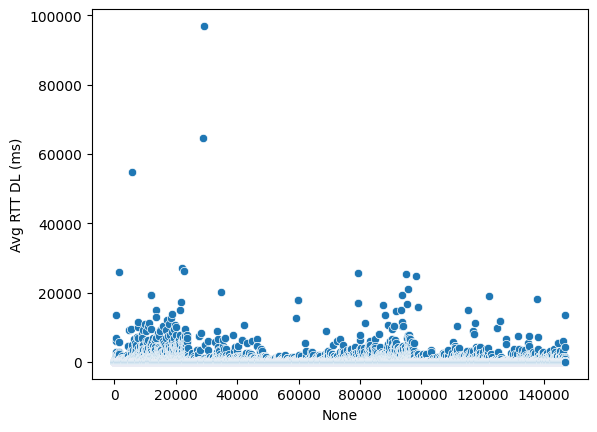

In [46]:
sns.scatterplot(x= new_df.index, y = new_df['Avg RTT DL (ms)'])

### Average throughput

In [6]:
new_df['Average throughput'] = new_df[[ 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',]].mean(axis=1)
new_df['Average throughput']
 


0            33.5
1            21.0
2             7.5
3            44.0
4             7.5
           ...   
146886    32406.5
146887       58.5
146888       38.5
146889       45.0
146890       35.5
Name: Average throughput, Length: 146891, dtype: float64

In [57]:
user_experience_table=new_df[['Average TCP retransmission','Average RTT','Average throughput']]
user_experience_table
user_experience_table.to_csv('user_experience_table.csv', index=False)

<Axes: xlabel='None', ylabel='Average throughput'>

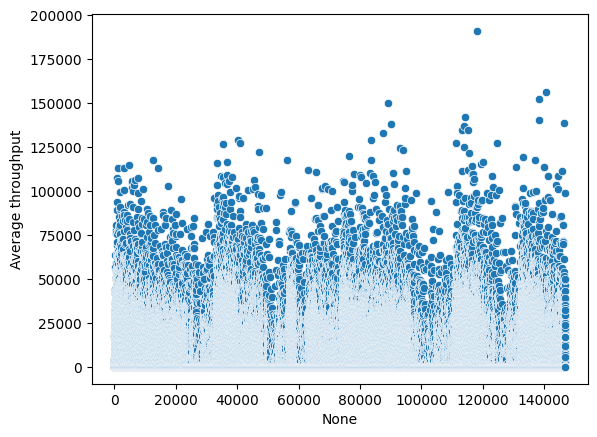

In [48]:
sns.scatterplot(x= new_df.index, y = new_df['Average throughput'])

## list of the 10 top, bottom and most frequent:TCP values in the dataset. RTT values in the dataset.Throughput values in the dataset.


In [11]:
# Top 10 TCP Retransmission Values
top_10_tcp_retransmission = new_df.nlargest(10, 'Average TCP retransmission')

# Bottom 10 TCP Retransmission Values
bottom_10_tcp_retransmission = new_df.nsmallest(10, 'Average TCP retransmission')

# Most Frequent TCP Retransmission Values
most_frequent_tcp_retransmission = new_df['Average TCP retransmission'].value_counts().nlargest(10)


In [ ]:

# Top 10 RTT Values
top_10_rtt = new_df.nlargest(10, 'Average RTT')

# Bottom 10 RTT Values
bottom_10_rtt = new_df.nsmallest(10, 'Average RTT')

# Most Frequent RTT Values
most_frequent_rtt = new_df['Average RTT'].value_counts().nlargest(10)


In [ ]:

# Top 10 Throughput Values
top_10_throughput = new_df.nlargest(10, 'Average throughput')

# Bottom 10 Throughput Values
bottom_10_throughput = new_df.nsmallest(10, 'Average throughput')

# Most Frequent Throughput Values
most_frequent_throughput = new_df['Average throughput'].value_counts().nlargest(10)


## The distribution of the average throughput  per handset type 

In [12]:
# Compute the distribution of average throughput per handset type
average_throughput_distribution = new_df.groupby('Handset Type')['Average throughput'].describe()

# Display the distribution of average throughput per handset type
print(average_throughput_distribution)


                                                     count          mean  \
Handset Type                                                               
A-Link Telecom I. Cubot A5                             1.0  11755.000000   
A-Link Telecom I. Cubot Note Plus                      1.0   3349.500000   
A-Link Telecom I. Cubot Note S                         1.0   4468.500000   
A-Link Telecom I. Cubot Nova                           1.0  28108.500000   
A-Link Telecom I. Cubot Power                          1.0  34734.000000   
...                                                    ...           ...   
Zte Zte Blade C2 Smartphone Android By Sfr Star...     2.0     29.000000   
Zyxel Communicat. Lte7460                              1.0  30978.000000   
Zyxel Communicat. Sbg3600                              1.0  48675.500000   
Zyxel Communicat. Zyxel Wah7706                        1.0   1086.500000   
undefined                                           8820.0   5035.710544   

           

## plot of Distribution of Average Throughput per Handset Type

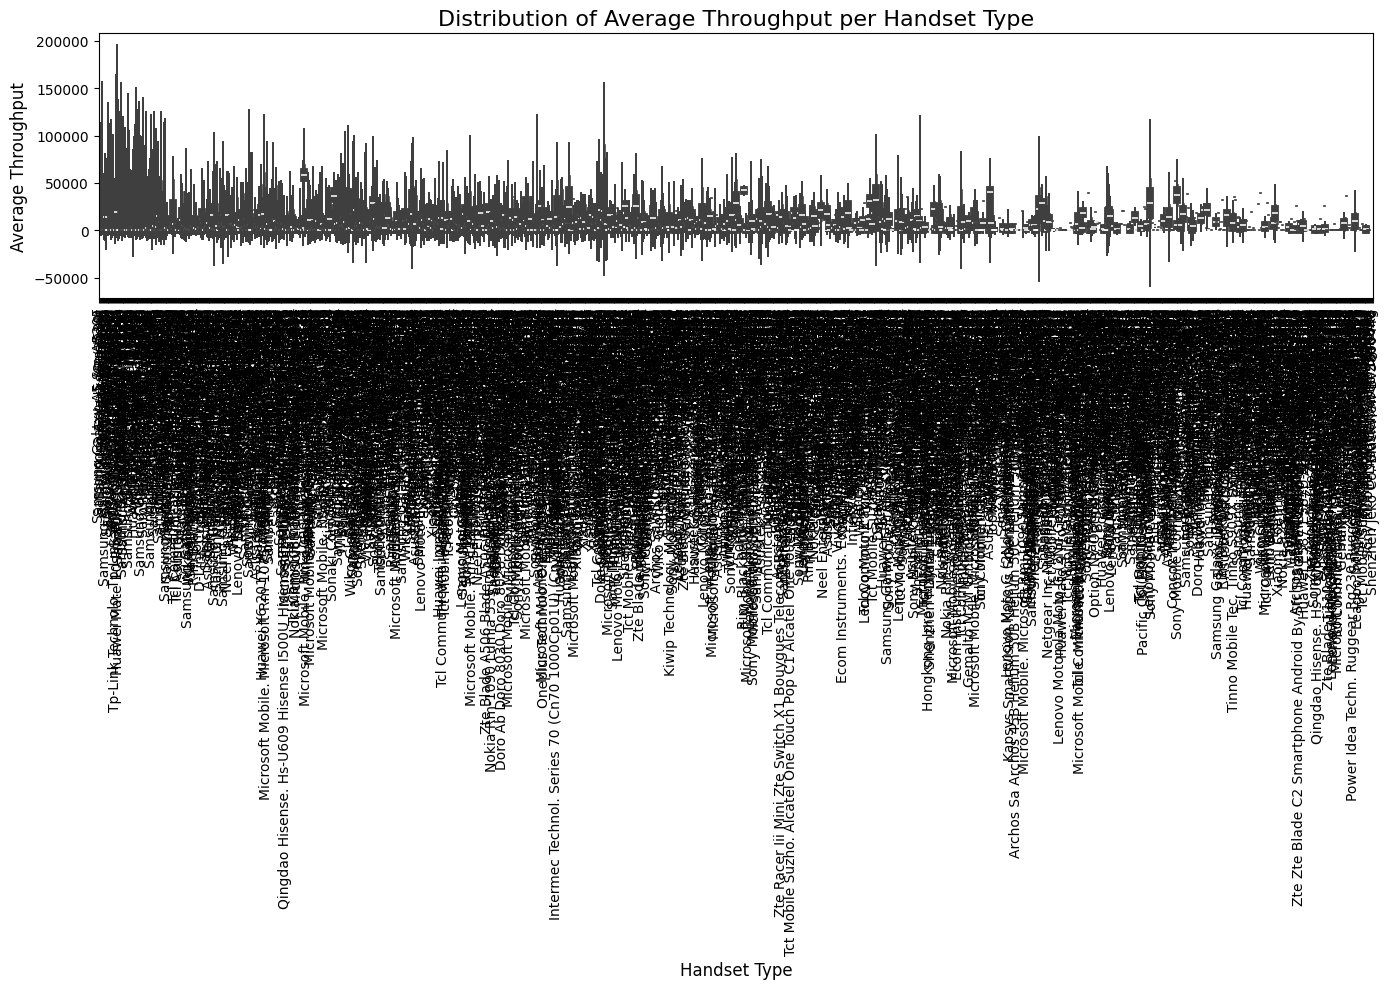

In [20]:


# Set the size of the plot
plt.figure(figsize=(14, 10))

# Create a violin plot to visualize the distribution of average throughput per handset type
sns.violinplot(x='Handset Type', y='Average throughput', data=new_df)
plt.title('Distribution of Average Throughput per Handset Type', fontsize=16)
plt.xlabel('Handset Type', fontsize=12)
plt.ylabel('Average Throughput', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


## The average TCP retransmission view per handset type

In [13]:
# Compute the distribution of average TCP retransmission per handset type
average_tcp_retransmission_distribution = new_df.groupby('Handset Type')['Average TCP retransmission'].describe()

# Display the distribution of average TCP retransmission per handset type
print(average_tcp_retransmission_distribution)


                                                     count          mean  \
Handset Type                                                               
A-Link Telecom I. Cubot A5                             1.0  3.965635e+05   
A-Link Telecom I. Cubot Note Plus                      1.0  3.081065e+05   
A-Link Telecom I. Cubot Note S                         1.0  2.070587e+07   
A-Link Telecom I. Cubot Nova                           1.0  6.858500e+04   
A-Link Telecom I. Cubot Power                          1.0  4.020500e+03   
...                                                    ...           ...   
Zte Zte Blade C2 Smartphone Android By Sfr Star...     2.0  3.218896e+06   
Zyxel Communicat. Lte7460                              1.0  2.063827e+07   
Zyxel Communicat. Sbg3600                              1.0  2.674347e+07   
Zyxel Communicat. Zyxel Wah7706                        1.0  1.570450e+04   
undefined                                           8820.0  5.103016e+06   

           

## plot of Distribution of Average TCP Retransmission per Handset Type

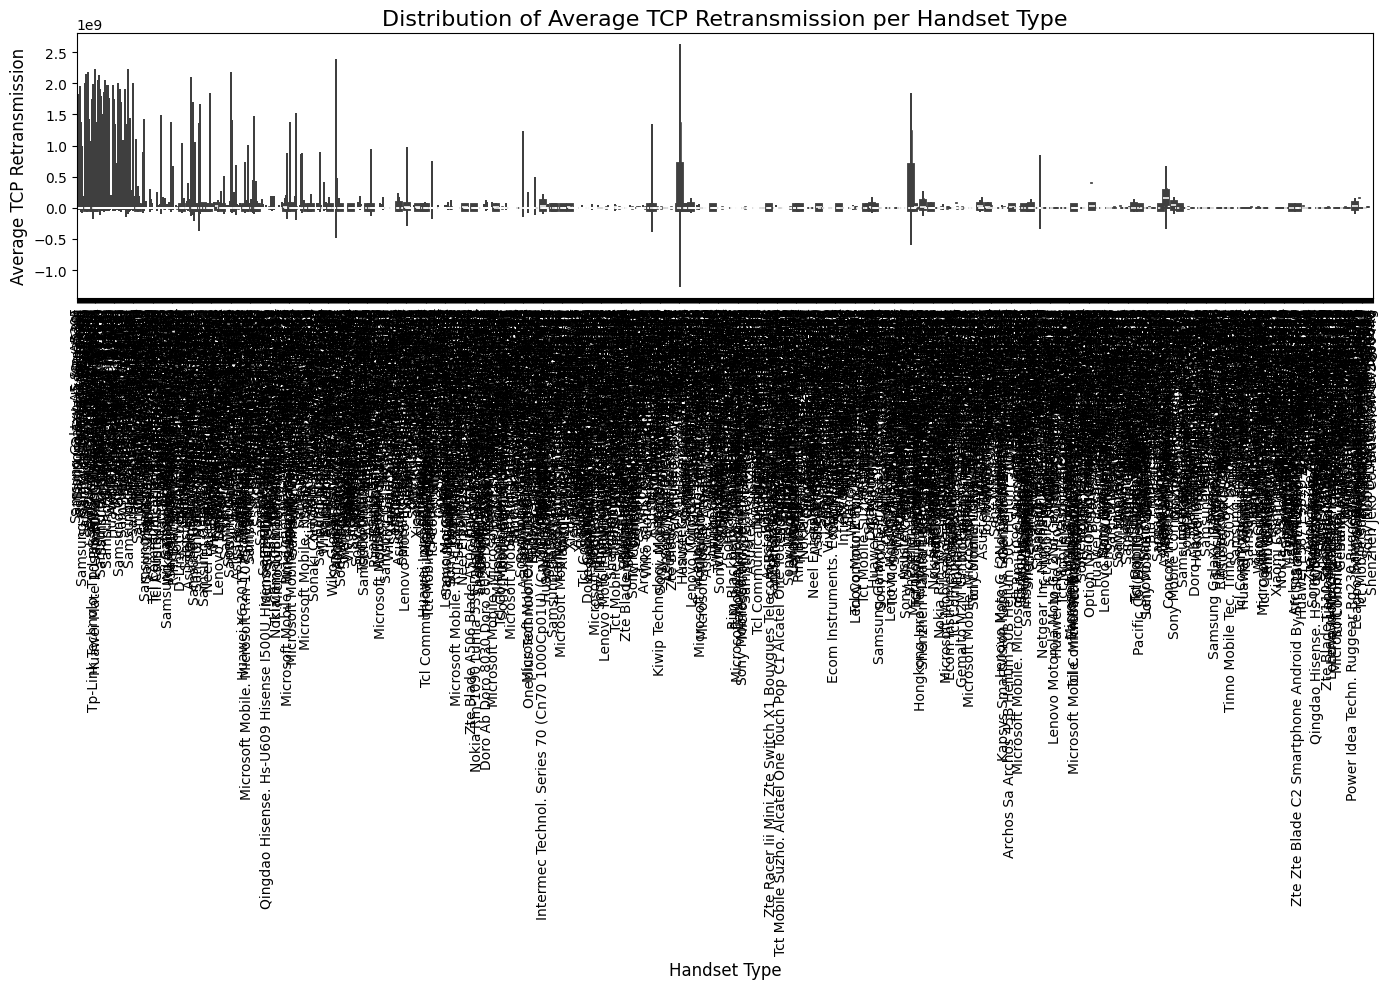

In [19]:


# Set the size of the plot
plt.figure(figsize=(14, 10))

# Create a violin plot to visualize the distribution of average TCP retransmission per handset type
sns.violinplot(x='Handset Type', y='Average TCP retransmission', data=new_df)
plt.title('Distribution of Average TCP Retransmission per Handset Type', fontsize=16)
plt.xlabel('Handset Type', fontsize=12)
plt.ylabel('Average TCP Retransmission', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


## Using the experience metrics to perform a k-means 

In [37]:


# Select relevant engagement metrics for clustering
experience_metrics = new_df[['Average TCP retransmission', 'Average RTT', 'Average throughput']]

# # Standardize the experience metrics
scaler = StandardScaler()
experience_metrics_standardized = scaler.fit_transform(experience_metrics)

# # Perform K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(experience_metrics_standardized)

# # Add the cluster labels to the original DataFrame
new_df['Cluster'] = cluster_labels



In [44]:
# Calculate the mean values for each cluster separately
cluster_means = new_df.groupby('Cluster')[['Average TCP retransmission', 'Average RTT', 'Average throughput']].mean()
cluster_means

# # Custom description for each cluster based on the mean values
# # Cluster 0
# cluster_0_description = "Cluster 0 represents users with relatively low average TCP retransmission, moderate average RTT, and high average throughput."

# # Cluster 1
# cluster_1_description = "Cluster 1 represents users with high average TCP retransmission, low average RTT, and moderate average throughput."

# # Cluster 2
# cluster_2_description = "Cluster 2 represents users with moderate average TCP retransmission, high average RTT, and low average throughput."



,Average TCP retransmission,Average RTT,Average throughput
Cluster,,,
0,3.812037e+06,53.015635,2229.901369
1,3.363728e+07,52.212208,31260.027579
2,1.217796e+06,5598.515625,1645.431250
